# Dogs vs Cats
We'll create a simple cat vs dog classifier.  
Dataset can be downloaded from https://www.microsoft.com/en-us/download/details.aspx?id=54765

**Data**: Labeled images of dogs and cats.  
We want to learn a **classifier**: A function that returns a label (here: `cat`/`dog`) for images

In [ ]:
!unzip kagglecatsanddogs_5340.zip

# Read images

In [1]:
import os
dog_dir = 'PetImages/Dog'
cat_dir = 'PetImages/Cat'
dog_paths = os.listdir(dog_dir)
cat_paths = os.listdir(cat_dir)

In [2]:
len(dog_paths), len(cat_paths)

(12501, 12501)

In [3]:
print(dog_paths[:10])

['3146.jpg', '6618.jpg', '80.jpg', '7058.jpg', '2706.jpg', '1613.jpg', '2367.jpg', '7439.jpg', '11199.jpg', '6279.jpg']


In [4]:
# sort the paths
dog_paths.sort()
cat_paths.sort()
print(dog_paths[:10])

dog_paths = [os.path.join(dog_dir, dog_path) for dog_path in dog_paths if dog_path.endswith('.jpg')]
cat_paths = [os.path.join(cat_dir, cat_path) for cat_path in cat_paths if cat_path.endswith('.jpg')]

['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1000.jpg', '10000.jpg', '10001.jpg', '10002.jpg', '10003.jpg', '10004.jpg']


In [5]:
dog_paths[:10]

['PetImages/Dog/0.jpg',
 'PetImages/Dog/1.jpg',
 'PetImages/Dog/10.jpg',
 'PetImages/Dog/100.jpg',
 'PetImages/Dog/1000.jpg',
 'PetImages/Dog/10000.jpg',
 'PetImages/Dog/10001.jpg',
 'PetImages/Dog/10002.jpg',
 'PetImages/Dog/10003.jpg',
 'PetImages/Dog/10004.jpg']

In [6]:
# Pillow library for decoding images
from PIL import Image
import numpy as np

def load_images(image_paths, target_size):
    images = []
    ## TODO: Load images from disk, resize to target_size, and return list of images
    ## Pillow library, Image class - open, convert, resize: https://pillow.readthedocs.io/en/stable/reference/Image.html

#     for p in image_paths:
#         img = Image.open(p)
#         img = img.convert("RGB")
#         img = img.resize(target_size)
#         img = np.array(img)
#         images.append(img)
        
    images = [np.array(Image.open(p).convert("RGB").resize(target_size)) for p in image_paths]
    
    return images

In [7]:
n_imgs = 1200
target_size = (128, 128) # Easier to compare images of the same size

## Load 1200 images for each class
dog_images = load_images(dog_paths[:n_imgs], target_size)
cat_images = load_images(cat_paths[:n_imgs], target_size)

In [8]:
len(dog_images), len(cat_images)

(1200, 1200)

In [9]:
dog_images[0].shape

(128, 128, 3)

In [10]:
dog_images[0]

array([[[119, 117, 129],
        [110, 108, 124],
        [115, 113, 127],
        ...,
        [138, 140, 152],
        [134, 136, 148],
        [134, 134, 144]],

       [[122, 120, 132],
        [113, 111, 127],
        [118, 115, 130],
        ...,
        [141, 143, 155],
        [137, 139, 151],
        [137, 137, 147]],

       [[124, 122, 134],
        [116, 114, 130],
        [120, 118, 132],
        ...,
        [145, 147, 159],
        [141, 143, 154],
        [139, 141, 151]],

       ...,

       [[ 70,  80,  86],
        [ 77,  80,  88],
        [ 69,  74,  80],
        ...,
        [ 65,  73,  78],
        [ 61,  68,  73],
        [ 63,  71,  74]],

       [[ 72,  76,  80],
        [ 71,  79,  82],
        [ 67,  78,  80],
        ...,
        [ 65,  72,  80],
        [ 65,  72,  80],
        [ 74,  82,  85]],

       [[ 69,  74,  78],
        [ 69,  76,  79],
        [ 66,  77,  79],
        ...,
        [ 71,  78,  86],
        [ 80,  87,  95],
        [ 70,  78,  81]]

# Show some dogs and cats!

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

Use `imshow` function from matplotlib: https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.imshow.html

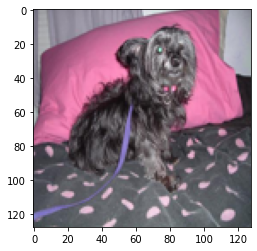

In [12]:
plt.imshow(dog_images[0])

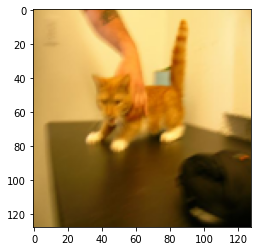

In [13]:
plt.imshow(cat_images[0])

# Simple nearest neighbor classification
We will split our dataset to training set and test set.  
Our model with predict if a test image is of cat or dog based on **a label of the closest image.**  

![nn](nn.png)
*Image source: https://www.kdnuggets.com/2019/07/classifying-heart-disease-using-k-nearest-neighbors.html*

We'll measure **image similarity** as a simple mean **absolute distance between pixel values**.  

\begin{equation}
D(x_{train}, x_{test}) = \frac{1}{|pixels|}\sum_{pixels}{|x_{train}^{pixel} - x_{test}^{pixel}|}
\end{equation}

Nearest neighbors:  
**Training data:** ($x_{train}^i$), corresponding labels $y_{train}^i$  
**Test example:** $x_{test}$. We want to find a prediction for the test example $y_{pred}$.  
**Algorithm**:  
$j= \underset{x}{\mathrm{argmin}} D(x_{train}, x_{test})$  
$y_{pred} = y_{train}^{j}$


In [14]:
# img1, img2 - 2 images of the same size
# Return mean absolute distance
def image_dist(img1, img2):
    H, W, C = img1.shape
    distance = 0.
    for i in range(H):
        for j in range(W):
            for c in range(C):
                distance += np.abs(img1[i,j,c] - img2[i,j,c])
    distance = distance / (H * W * C)
    return distance

**^ Don't do this! NumPy is optimized for vectorized operations**

In [15]:
# img1, img2 - 2 images of the same size
def image_dist_vectorized(img1, img2):
    ## TODO - write a vectorized version
    # img1 [128, 128, 3]
    # img2 [128, 128, 3]
    
    distance = np.abs(img1 - img2).mean() # [128, 128, 3]
    
    return distance

In [16]:
img1 = dog_images[0].astype(np.float32)
img2 = dog_images[1].astype(np.float32)

In [17]:
%timeit -n 10 image_dist(img1, img2)

76.7 ms ± 746 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
%timeit -n 10 image_dist_vectorized(img1, img2)

125 µs ± 39 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Prepare the dataset
We need train images, test images, and labels

In [19]:
dog_images = np.array(dog_images).astype(np.float32)
cat_images = np.array(cat_images).astype(np.float32)
print(dog_images.shape, cat_images.shape)

# 4D Tensor of images: NxHxWxC
# N - number of images
# H - height
# W - width
# C - number of channels (RGB)
# (N, H, W, C)

(1200, 128, 128, 3) (1200, 128, 128, 3)


In [20]:
n_train = 1100 # 1100 out of 1200 for training, rest for test
dog_train = dog_images[:n_train]
cat_train = cat_images[:n_train]

dog_test = dog_images[n_train:]
cat_test = cat_images[n_train:]

x_train = np.concatenate((dog_train, cat_train), axis=0)
x_test = np.concatenate((dog_test, cat_test), axis=0)

y_train = ['dog' for i in range(len(dog_train))]
y_train.extend(['cat' for i in range(len(cat_train))])

y_test = ['dog' for i in range(len(dog_test))]
y_test.extend(['cat' for i in range(len(cat_test))])

In [21]:
print('Training set x_train shape: {}, y_train: {}'.format(x_train.shape, len(y_train)))
print('Test set x_test shape: {}, y_test: {}'.format(x_test.shape, len(y_test)))
print('Number of dogs in training set: {}'.format(np.sum(np.array(y_train)=='dog')))

Training set x_train shape: (2200, 128, 128, 3), y_train: 2200
Test set x_test shape: (200, 128, 128, 3), y_test: 200
Number of dogs in training set: 1100


In [22]:
class NNClassifier:
    
    def __init__(self):
        pass
    
    def train(self, images, labels):
        # TODO - write a training method for NN Classifier (lazy classifier - just saving the data)
        self.images = images
        self.labels = labels

        
    def predict(self, image):
        # TODO - Find the closest image, distance to it and its label
        
        distance = np.inf
        for i, other in enumerate(self.images):
            cur_distance = image_dist_vectorized(other, image)
            if cur_distance < distance:
                predicted_label = self.labels[i]
                closest_image = self.images[i]
                distance = cur_distance

        return predicted_label, min_distance, closest_image

In [33]:
class NNClassifierVectorized:
    
    def __init__(self):
        pass
    
    def train(self, images, labels):
        # TODO - write a training method for NN Classifier (lazy classifier - just saving the data)
        self.images = images
        self.labels = labels
        
    def predict(self, image):
        # TODO - write a vectorized method without any for loops
        # image [n, 128, 128, 3]
        # self.images [n, 128, 128, 3]
        
        distances = np.mean(np.abs(image - self.images), axis=(1, 2, 3)) # [n, 128, 128, 3]
        min_index = np.argmin(distances)
        predicted_label = self.labels[min_index]
        closest_image = self.images[min_index]
        min_distance = distances.min()
        
        return predicted_label, min_distance, closest_image

In [34]:
classifier = NNClassifierVectorized()
classifier.train(x_train, y_train)

# Classify an image!

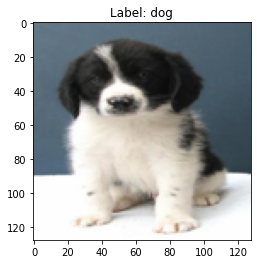

In [35]:
test_ind = 0
plt.imshow(x_test[test_ind] / 256)
plt.title('Label: {}'.format(y_test[test_ind]));

In [36]:
pred_label, min_dist, closest_image = classifier.predict(x_test[test_ind])

Predicted label: cat
Distance: 44.59110641479492


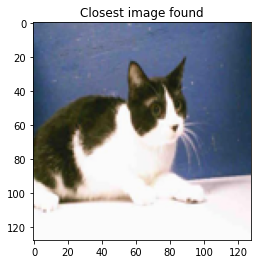

In [37]:
print('Predicted label: {}'.format(pred_label))
print('Distance: {}'.format(min_dist))
plt.imshow(closest_image / 256)
plt.title('Closest image found');

# Evaluate accuracy
How many dogs and cats from test set are classified correctly?

In [38]:
# TODO Run prediction on the entire test set x_test
#      Compute accuracy using predicted labels and true labels y_test
predicted_labels = []

In [39]:
# TODO Write the predictions to predicted_labels list
predicted_labels = [classifier.predict(test_image)[0] for test_image in x_test]

In [ ]:
import tqdm

In [40]:
y_test = np.array(y_test)
predicted_labels = np.array(predicted_labels)

In [41]:
# TODO compute accuracy
accuracy = (y_test == predicted_labels).mean()
print('Accuracy: {}%'.format(100*accuracy))

Accuracy: 59.5%
